In [1]:
using Luxor

In [4]:
#Solo para crear la Espiral de Ulam
using Primes

┌ Info: Precompiling Primes [27ebfcd6-29c5-5fa9-bf4b-fb8fc14df3ae]
└ @ Base loading.jl:1278


# Funciones para crear nuevas matrices

In [5]:

function reflejar_eje_x(A)
    
    k = size(A)[1]
    l = size(A)[2]
    
    B = zeros(Int8, (k,l))
    
    for i ∈ 1:l, j ∈ 1:k
        
        B[k + 1 - j, i ] = A[j,i]
        
    end
        return B
end

reflejar_eje_x (generic function with 1 method)

In [6]:
function reflejar_eje_y(A)
    
    k = size(A)[1]
    l = size(A)[2]
    
    B = zeros(Int8, (k,l))
    
    for i ∈ 1:l, j ∈ 1:k
        
        B[j, l + 1 - i ] = A[j,i]
        
    end
        return B
end

reflejar_eje_y (generic function with 1 method)

In [7]:
function reflejar_origen(A)
    
    k = size(A)[1]
    l = size(A)[2]
    
    B = zeros(Int8, (k,l))
    
    for i ∈ 1:l, j ∈ 1:k
        
        B[k + 1 - j, l + 1 - i ] = A[j,i]
        
    end
        return B
end

reflejar_origen (generic function with 1 method)

In [8]:
function trasladar_abajo(A, n)
    
    k = size(A)[1]
    l = size(A)[2]
    
    B = zeros(Int8, (k,l))
    
    for i ∈ 1:l, j ∈ 1:(k - n)

        B[j + n, i] = A[j, i]
    end
    return B
    
end


trasladar_abajo (generic function with 1 method)

In [9]:
function trasladar_derecha(A,n)
    
    k = size(A)[1]
    l = size(A)[2]
    
    B = zeros(Int8, (k,l))
    
    for i ∈ 1:(l - n), j ∈ 1:k

        B[j, i + n] = A[j, i]
    end
    return B
end

trasladar_derecha (generic function with 1 method)

In [10]:
#Solo es para el experimento PT

function recorrerPT(A)
    
    PT2 = zeros(Int8, (300, 300))
    for i ∈ 1:size(A,1), j ∈ 1:size(A,1)
        PT2[j + 72, i + 50] = PT[j, i]
    end
    return PT2
end

recorrerPT (generic function with 1 method)

In [11]:


function ampliar(A, n)
    
    k = size(A)[1]
    l = size(A)[2]
    
    B = zeros(Int8, (n,n))
    
    [B[j,i] = A[j,i] for i ∈ 1:l, j ∈ 1:k]
    
    return B
end



ampliar (generic function with 1 method)

# Experimentos

## Espiral de Ulam

In [12]:
#=
    
    Valores iniciales
=#

Ulam = zeros(Int128, (250, 250))
j, i = Int128(size(Ulam, 1) /2) , Int128(size(Ulam, 1) /2) #Tiene que ser la mitad de la matriz 
valor = 2
pasos = 1
Ulam[j,i] = 1
Ulam2 = copy(Ulam)
Ulam3 = zeros(Int128, (size(Ulam2, 1), size(Ulam2, 1)))
#=
    Algoritmo 
=#

for k ∈ 1:(Int128(size(Ulam, 1)/2) - 1)
    
    #Primero nos movemos la derecha
    
    for p ∈ 1:pasos
        Ulam2[j, i + p] = valor 
        valor += 1
    end
    j = j
    i = i + pasos

    #Ahora no movemos arriba 

    for p ∈ 1:pasos
        Ulam2[j - p, i ] = valor 
        valor += 1
    end
    i = i
    j = j - pasos
    pasos += 1


    #Nos movemos la izquierda


    for p ∈ 1:pasos 
        Ulam2[j , i - p] = valor
        valor += 1
    end

    i = i - pasos
    j = j

    #Nos movemos hacia abajo

    for p ∈ 1:pasos
        Ulam2[j + p , i] = valor
        valor += 1
    end

    i = i
    j = j + pasos
    pasos += 1
    
end

#Dibujar la matriz con base en la de primos

for i ∈ 1:size(Ulam2, 1), j ∈ 1:size(Ulam2, 1)
    
    if isprime(Ulam2[j,i]) == true
        
        Ulam3[j,i] = 1
        
    end
end


#@draw dibujar_matriz(Ulam3)




In [13]:
#Inversa de Ulam3

Ulam4 = zeros(Int8, (size(Ulam3, 1), size(Ulam3, 1)))

for i ∈ 1:size(Ulam3, 1), j ∈ 1:size(Ulam3, 1)
    
    if Ulam3[j,i] == 1
        
        Ulam4[j,i] = 0
    else 
        Ulam4[i,j] = 1
        
    end
end
;
#@draw dibujar_matriz(Ulam4)

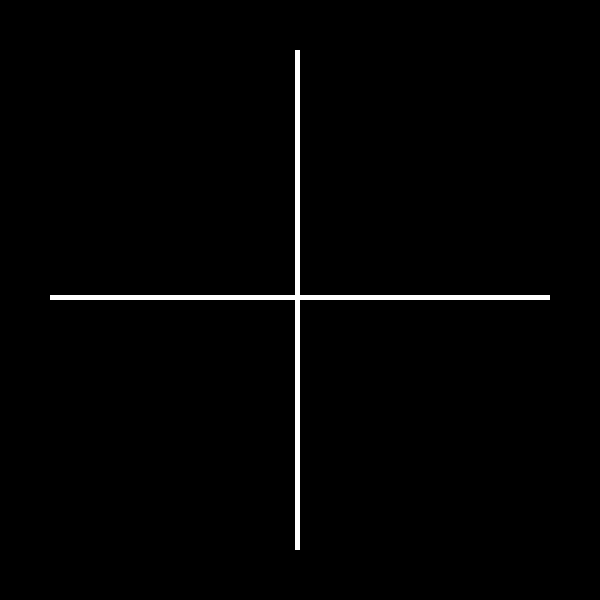

In [24]:
#Una cruz

Cruz = zeros(Int8, (100,100))
Cruz[50, 1:size(Cruz,1)] .= 1
Cruz[1:size(Cruz, 1), 50] .= 1
;
@draw dibujar_matriz(Cruz,1,1,1)

In [34]:
Mprimos = zeros(Int8, (100,100))

for i ∈ 1:size(Mprimos,1), j ∈ 1:size(Mprimos,1)
    if isprime(i) == true ||  isprime(j) ==  true 
        Mprimos[i,j] = 1
    end
end

;
#@draw dibujar_matriz(Mprimos)

In [37]:
D = zeros(Int8, (100,100))
for i ∈ 1:size(D,1), j ∈ 1:size(D,1)
    if i == j 
        D[i,j] = 1
    end
end

D1 = reflejar_eje_x(D)
D2 = D + D1
;
#@draw dibujar_matriz(D2)

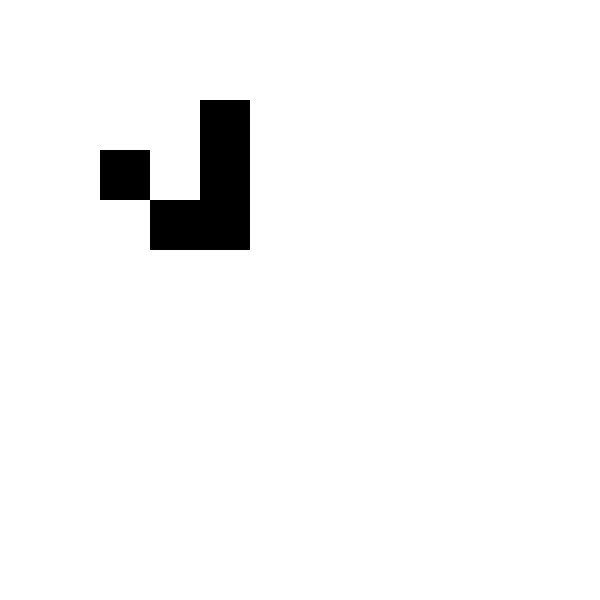

In [86]:
#=
Glider
=#

G = zeros(Int8, (10,10)) #Matriz de ceros
G[4, 3:4] .= 1
G[3, 2] = 1
G[2:4, 4] .= 1

;
@draw dibujar_matriz(G,0,0,0)

In [39]:
#matriz aleatoria de 1 y 0 en cada entrada

Mrand = zeros(Int8, (50,50))
for i ∈ 1:size(Mrand, 1), j ∈ 1:size(Mrand, 1)
    r = rand(0:1)
    Mrand[j,i] = r
end
;
#@draw dibujar_matriz(Mrand)

## Glider cannon

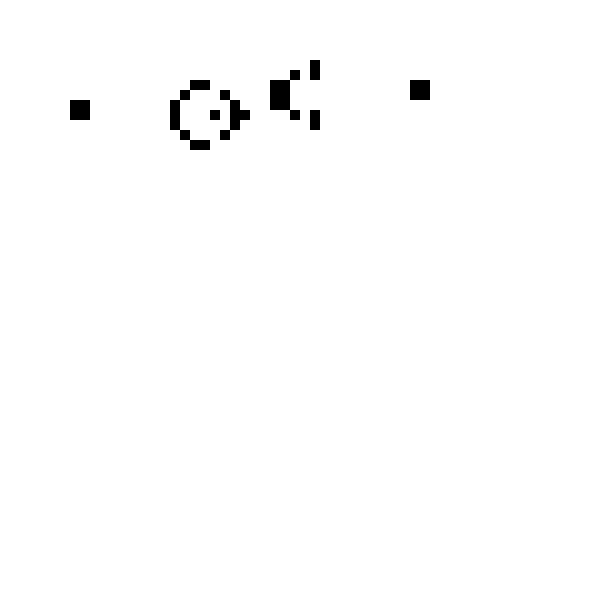

In [59]:
#= 
Cañón de gliders
Cada 30 generaciones se genera un glider

=#
C = zeros(Int8, (50,50))
C[6:7, 3:4] .= 1
C[6:8, 13] .= 1
C[5, 14] = 1
C[9, 14] = 1
C[10, 15:16] .= 1
C[4, 15:16] .= 1
C[7, 17] = 1
C[5, 18] = 1
C[9, 18] = 1
C[6:8, 19] .= 1
C[7, 20] = 1
C[4:6, 23:24] .= 1
C[3, 25] = 1
C[7, 25] = 1
C[7:8, 27] .= 1
C[2:3, 27] .= 1
C[4:5, 37:38] .=1
;
@draw dibujar_matriz(C, 0, 0, 0)

In [2]:
#= 
Conidicion inicial interesante "U"
con estabilidad hasta la generacion 180
=#

H = zeros(Int8, (50,50))
H[26, 24:26] .= 1
H[24:26, 24] .= 1
H[24:26, 26] .= 1
;
#@draw dibujar_matriz(H)

In [37]:
#Cara

J = zeros(Int8, (50,50))
J[23:25, 29] = J[23:25, 21] .= 1
J[28, 24:26] .= 1
J[26, 22] = J[26, 28] =  1
J[27, 23] = J[27, 27] = 1

;
#@draw dibujar_matriz(J, 1, 0, 0)

In [35]:
#J1 saca 4 gliders en diagonal

J1 = reflejar_eje_x(J) + J
;
#@draw dibujar_matriz(J1, 0,1,0)

In [20]:
#Ventana

E1 = zeros(Int8, (50,50))
E1[20:30, 20] = E1[20:30, 30] .= 1
E1[20, 20:30] = E1[30, 20:30] .= 1
E1[20:30, 25] .= 1
E1[25, 20:30] .=1
;
#@draw dibujar_matriz(E1)

In [15]:
#Cuadriculado

E2 = zeros(Int8, (50,50))

for i ∈ 1:size(E2,1), j ∈ 1:size(E2,1)
    if i % 2 == 0 || j % 2 == 0
        E2[i,j] = 1
    end
end
;
#@draw dibujar_matriz(E2)

In [6]:

E3 = zeros(Int8, (50,500))

for i ∈ 1:size(E3,1), j ∈ 1:size(E3,1)
    if i % 2 == 0 && j % 2 == 0
        E3[i,j] = 1
    end
    if i == j
        E3[i,j] = 1
    end
end
;
#@draw dibujar_matriz(E3)

In [16]:
#=
L[i]nea recta
Estable a las 500 generaciones
=#

E4 = zeros(Int8, (100,100))
E4[1:size(E4, 1), 50] .= 1
;
#@draw dibujar_matriz(E4)

In [41]:
E5 = zeros(Int8, (500, 500))
E5[100:400, 254:256] .= 1
;
#@draw dibujar_matriz(E5)

## Cuatro glider cannons

In [20]:
C1 = reflejar_eje_x(C)
C2 = reflejar_eje_y(C)
C3 = reflejar_eje_x(C2)

C4 = C + C1 + C2 + C3
;
#@draw dibujar_matriz(C4)

LoadError: [91mUndefVarError: C not defined[39m

In [64]:
#Matusalen

#"Diehard"

DH = zeros(Int8, (50,50))

DH[24, 28] = 1
DH[25, 22:23] .= 1
DH[26, 23] = 1 
DH[26, 27:29] .= 1
;
#@draw dibujar_matriz(DH)


In [8]:
#= 
"T"
Una condicion inicial muy interesante 
con estabilidad hasta la generacion 1500
=#

C2 = zeros(Int8, (100, 100))
C2[48, 48:49] .= 1
C2[49, 49:50] .= 1
C2[50, 49] = 1
;
#@draw dibujar_matriz(C2) #Ver la matriz 

In [9]:
C5 = C2 + C4
;
#@draw dibujar_matriz(C5)

LoadError: [91mUndefVarError: C4 not defined[39m

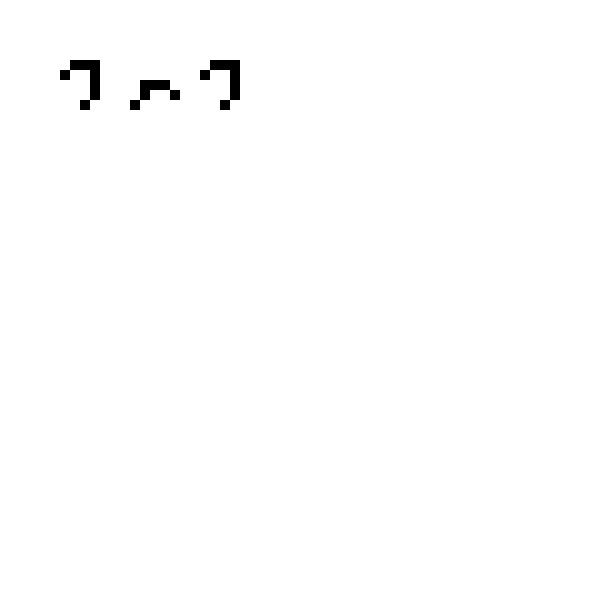

In [67]:
#= 
Puffer. Va a caminar hacia la derecha
=#

P = zeros(Int8, (50,50))
P[3, 2] = 1
P[2, 3:5] .= 1
P[2:5, 5] .= 1
P[6, 4] = 1
P[6, 9] = 1
P[4:5, 10] .= 1
P[4, 10:12] .= 1
P[5, 13] = 1
P[3, 16] = 1
P[2, 17:19] .= 1
P[2:5, 19] .= 1
P[6, 18] = 1
;
@draw dibujar_matriz(P,0,0,0)

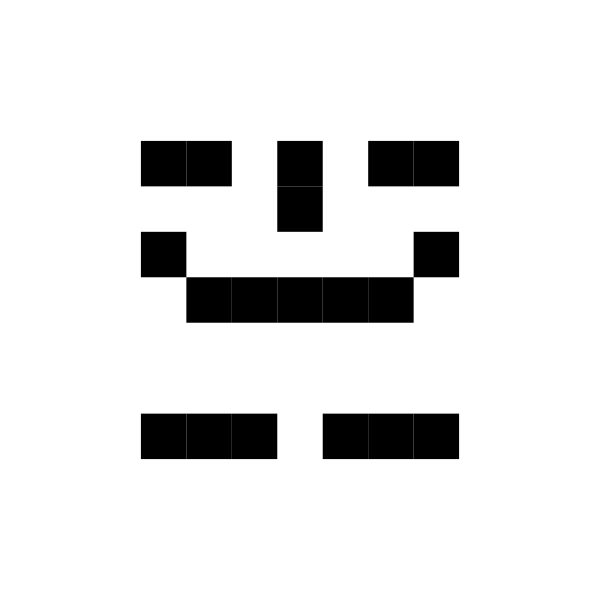

In [63]:
#= 
Blinker. Configuracion estable que se reinicia con periodo 8
=#

B = zeros(Int8, (11, 11))
B[3, 3:4] .= 1
B[3, 8:9] .= 1
B[3:4, 6] .= 1
B[5, 3] = 1
B[5, 9] = 1
B[6, 4:8] .= 1
B[9, 3:5] = B[9, 7:9] .= 1 
;
@draw dibujar_matriz(B, 0, 0, 0)

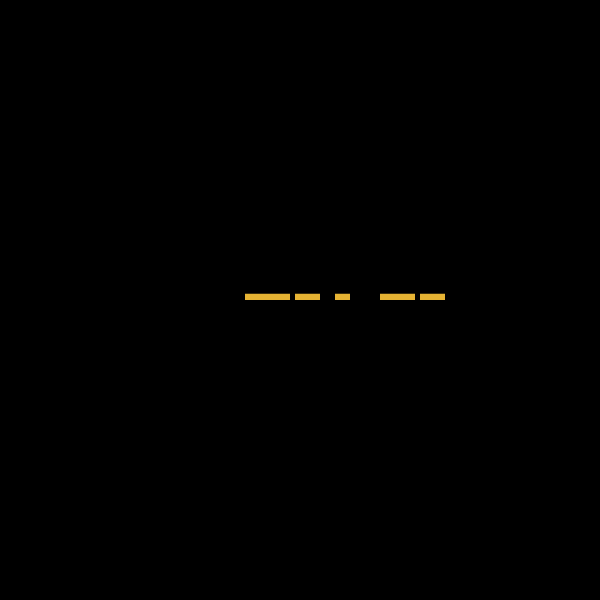

In [71]:
#Configuracion unidimensional

L = zeros(Int8, (100,80))
L[50, 30:38] .= 1
L[50, 40:44] .= 1
L[50, 48:50] .= 1
L[50, 57:63] .= 1
L[50, 65:69] .= 1

@draw dibujar_matriz(L, .9, .7, .2)

## Puffer train 

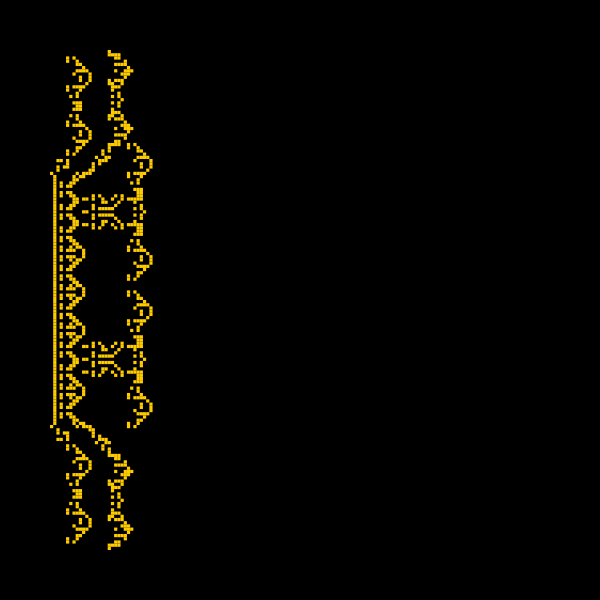

In [15]:
PT = zeros(Int8, (156,156))
PT[1,19] = 1
PT[2, 19:22] .= 1
PT[3, 6] = PT[3, 8] = PT[3, 21] = PT[3, 22] = 1
PT[4, 6] = PT[4, 9] = PT[4, 24] = 1
PT[5, 9:10] .= 1
PT[5, 21:24] .= 1
PT[6, 11] = PT[6, 25] = 1
PT[7, 9:12] .= 1
PT[7, 21] = 1
PT[7, 24:26] .= 1
PT[8,8] = 1
PT[8, 13] = 1
PT[8, 23:25] .= 1
PT[9, 10] = PT[9, 13] = PT[9, 24] = 1
PT[10, 10] = PT[10, 13] = 1
PT[10, 19] = 1
PT[10, 21:23] .= 1
PT[11, 12] = 1
PT[11, 19:20] .= 1
PT[11, 23] = 1
PT[12, 6] = 1
PT[12, 8:11] .= 1
PT[12, 20:22] .= 1
PT[13, 6] = 1
PT[13, 10] = 1
PT[13, 20] = 1
PT[14, 9] = PT[14, 22] = 1
PT[15, 7] = PT[15, 9] = PT[15, 20] = PT[15, 22] = 1
PT[16, 23] = 1
PT[17, 8:10] .= 1
PT[17, 20] = 1
PT[17, 22] = 1
PT[18, 9:10] .= 1
PT[18, 22] = 1
PT[19, 8:10] .= 1
PT[19, 20] = 1
PT[20, 20:22] .= 1
PT[21, 7] = PT[21, 9] = 1
PT[21, 19:20] .= 1
PT[21, 23] = 1
PT[22, 9] = PT[22, 19] = 1
PT[22, 21:23] .= 1
PT[23, 6] = PT[23, 10] = PT[23, 24] = 1
PT[24, 6] = 1
PT[24, 8:11] .= 1
PT[24, 23:25] .= 1
PT[25, 12] = PT[25, 21] = 1
PT[25, 24:26] .= 1
PT[26, 10] = PT[26, 13] = PT[26, 25] = 1
PT[27, 10] = PT[27, 13] = 1
PT[27, 21:24] .= 1
PT[28, 8] = PT[28, 13] = PT[28, 24] = 1
PT[29, 9:12] .= 1
PT[29, 21:22] .= 1
PT[30, 11] = 1
PT[30, 19:22] .= 1
PT[30, 25] = PT[30, 27] = 1
PT[31, 9:10] .= 1
PT[31, 19] = PT[31, 25] = PT[31, 28] = 1
PT[32, 6] = PT[32, 9] = PT[32, 17] = PT[32, 19] = 1
PT[32, 28:29] .= 1
PT[33, 6] = PT[33, 8] = PT[33, 17] = PT[33, 30] = 1
PT[34, 15] = 1
PT[34, 18:19] .= 1
PT[34, 28:31] .= 1
PT[35, 3:4] .= 1
PT[35, 6] = 1
PT[35, 16:18] .= 1
PT[35, 27] = 1
PT[35, 32] = 1
PT[36, 6] = PT[36, 14] = PT[36, 16] = PT[36, 29] = PT[36, 32] = 1
PT[37, 3] = 1
PT[37, 5:6] .= 1
PT[37, 14] = PT[37, 29] = PT[37,32] = 1
PT[38, 3] = 1
PT[38, 13:14] .= 1
PT[38, 31] = 1
PT[39, 1] = PT[39, 9] = 1
PT[39, 11:13] .= 1
PT[39, 25] = 1
PT[39, 27:30] .= 1

#Franja vertical de la izquierda

PT[40:117, 2] .= 1

#Regresamos al llenado por renglones

PT[40, 8] = 1
PT[40, 10:11] .= 1
PT[40, 25] = PT[40, 29] = 1
PT[41, 8:9] .= 1
PT[41, 28] = 1
PT[42, 4] = 1
PT[42, 7:8] .= 1
PT[42, 26] = PT[42, 28] = 1
PT[43, 4] = 1
PT[43, 6:7] .= 1
PT[44, 27:29] .= 1
PT[45, 4] = 1
PT[45, 6:7] .= 1
PT[45, 28:29] .= 1
PT[46, 4] = 1
PT[46, 7:8] .= 1
PT[46, 14] = PT[46, 16] = PT[46, 21] = PT[46, 23] = 1
PT[46, 28:29] .= 1
PT[47, 8:9] .= 1
PT[47, 11:12] .= 1
PT[47, 14] = PT[47, 17] = PT[47, 20] = PT[47, 23] = 1
PT[47, 25:29] .= 1
PT[48, 8:9] .= 1
PT[48, 17:18] .= 1
PT[48, 22] = PT[48, 27] = 1
PT[49, 4] = 1
PT[49, 7:8] .= 1
PT[49, 14] = PT[49, 21] = PT[49, 29] = 1
PT[50, 4] = 1
PT[50, 6:7] .= 1
PT[50, 14] = 1
PT[50, 16:20] .= 1
PT[50, 27] = PT[50, 29] = 1
PT[51, 11:12] .= 1
PT[51, 30] = 1
PT[52, 4] = 1
PT[52, 6:7] .= 1
PT[52, 14] = 1
PT[52, 16:20] .= 1
PT[52, 27] = PT[52, 29] = 1
PT[53, 4] = 1
PT[53, 4] = 1
PT[53, 7:8] .= 1
PT[53, 14] = 1
PT[53, 21] = 1
PT[53, 29] = 1
PT[54, 8:9] .= 1
PT[54, 17:18] .= 1
PT[54, 22] = PT[54, 27] = 1
PT[55, 8:9] .= 1
PT[55, 11:12] .= 1
PT[55, 14] = PT[55, 17] = PT[55, 20] = PT[55, 23] = 1
PT[55, 25:29] .= 1
PT[56, 4] = 1
PT[56, 7:8] .= 1
PT[56, 14] = PT[56, 16] = PT[56, 21] = PT[56, 23] = 1
PT[56, 28:29] .= 1
PT[57, 4] = 1
PT[57, 6:7] .= 1
PT[57, 28:29] .= 1
PT[58, 27:29] .= 1
PT[59, 4] = 1
PT[59, 6:7] .= 1
PT[60, 4] = 1
PT[60, 7:8] .= 1
PT[60, 26] = PT[60, 28] = 1
PT[61, 8:9] .= 1
PT[61, 28] = 1
PT[62, 4] = PT[62, 7] = 1
PT[62, 9:10] .= 1
PT[62, 25] = PT[62, 29] = 1
PT[63, 4] = 1
PT[63, 6:8] .=1 
PT[63, 11] = PT[63, 25] = 1
PT[63, 27:30] .= 1
PT[64, 11] = PT[64, 31] = 1
PT[65, 4] = 1
PT[65, 6:8] .= 1
PT[65, 11] = PT[65, 29] = PT[65, 32] = 1
PT[66, 4] = PT[66, 7] = 1
PT[66, 9:10] .= 1
PT[66, 29] = PT[66, 32] = 1
PT[67, 8:9] .= 1
PT[67, 27] = PT[67, 32] = 1
PT[68, 4] = 1
PT[68, 7:8] .= 1
PT[68, 28:31] .= 1
PT[69, 4] = 1
PT[69, 6:7] .= 1
PT[69, 30] = 1
PT[70, 28:29] .= 1
PT[71, 4] = 1
PT[71, 6:7] .= 1
PT[71, 25] = PT[71, 28] = 1
PT[72, 4] = 1
PT[72, 7:8] .= 1
PT[72, 25] = PT[72, 27] = 1
PT[73, 8:9] .= 1
PT[74, 4] = PT[74, 7] = 1
PT[74, 9:10] .= 1
PT[75, 4] = 1
PT[75, 6:8] .= 1
PT[75, 11] = 1
PT[76, 11] = PT[76, 25] = PT[76, 27] = 1
PT[77, 4] = 1
PT[77, 6:8] .= 1
PT[77, 11] = PT[77, 25] = PT[77, 28] = 1
PT[78, 4] = PT[78, 7] = 1
PT[78, 9:10] .= 1
PT[78, 28:29] .= 1
PT[79, 8:9] .= 1
PT[79, 30] = 1
PT[80, 4] = 1
PT[80, 7:8] .= 1
PT[80, 28:31] .= 1
PT[81, 4] = 1
PT[81, 6:7] .= 1
PT[81, 27] = PT[81, 32] = 1
PT[82, 29] = PT[82, 32] = 1
PT[83, 4] = 1
PT[83, 6:7] .= 1
PT[83, 29] = PT[83, 32] = 1
PT[84, 4] = 1
PT[84, 7:8] .= 1
PT[84, 31] = 1
PT[85, 8:9] .= 1
PT[85, 25] = 1
PT[85, 27:30] .= 1
PT[86, 4] = PT[86, 7] = 1
PT[86, 9:10] .= 1
PT[86, 25] = 1
PT[86, 29] = 1
PT[87, 4] = 1
PT[87, 6:8] .= 1
PT[87, 11] = 1
PT[87, 28] = 1
PT[88, 11] = PT[88, 26] = PT[88, 28] = 1
PT[89, 4] = 1
PT[89, 6:8] .= 1
PT[89, 11] = 1
PT[90, 4] = PT[90, 7] = 1
PT[90, 9:10] .= 1
PT[90, 27:29] .= 1
PT[91, 8:9] .= 1
PT[91, 28:29] .= 1
PT[92, 4] = 1
PT[92, 7:8] .= 1
PT[92, 14] = PT[92, 16] = PT[92, 21] = PT[92, 23] = 1
PT[92, 28:29] .= 1
PT[93, 4] = 1
PT[93, 6:7] .= 1
PT[93, 11:12] .= 1
PT[93, 14] = 1
PT[93, 17] = PT[93, 20] = PT[93, 23] = 1
PT[93, 25:29] .= 1
PT[94, 17:18] .= 1
PT[94, 22] = PT[94, 27] = 1
PT[95, 4] = 1
PT[95, 6:7] .= 1
PT[95, 14] = PT[95, 21] = PT[95, 29] = 1
PT[96, 4] = 1
PT[96, 7:8] .= 1
PT[96, 14] = 1
PT[96, 16:20] .= 1
PT[96, 27] = PT[96, 29] = 1
PT[97, 8:9] .= 1
PT[97, 11:12] .= 1
PT[97, 30] = 1
PT[98, 8:9] .= 1
PT[98, 14] = 1
PT[98, 16:20] .= 1
PT[98, 27] = PT[98, 29] = 1
PT[99, 4] = 1
PT[99, 7:8] .= 1
PT[99, 14] = 1
PT[99, 21] = 1
PT[99, 29] = 1
PT[100, 4] = 1
PT[100, 6:7] .= 1
PT[100, 17:18] .= 1
PT[100, 22] = 1
PT[100, 27] = 1
PT[101, 11:12] .= 1
PT[101, 14] = PT[101, 17] = PT[101, 20] = PT[101, 23] = 1
PT[101, 25:29] .= 1
PT[102, 4] = 1
PT[102, 6:7] .= 1
PT[102, 14] = PT[102, 16] = PT[102, 21] = PT[102, 23] = 1
PT[102, 28:29] .= 1
PT[103, 4] = 1
PT[103, 7:8] .= 1
PT[103, 28:29] .= 1
PT[104, 8:9] .= 1
PT[104, 27:29] .= 1
PT[105, 4] = PT[105, 7] = 1
PT[105, 9:10] .= 1
PT[106, 4] = 1
PT[106, 6:8] .= 1
PT[106, 11] = PT[106, 26] = PT[106, 28] = 1
PT[107, 11] = PT[107, 28] = 1
PT[108, 4] = 1
PT[108, 6:8] .= 1
PT[108, 11] = PT[108, 25] = PT[108, 29] = 1
PT[109, 4] = PT[109, 7] = 1
PT[109, 9:10] .= 1
PT[109, 25] = 1
PT[109, 27:30] .= 1
PT[110, 8:9] .= 1
PT[110, 31] = 1
PT[111, 4] = 1
PT[111, 7:8] .= 1
PT[111, 29] = PT[111, 32] = 1
PT[112, 4] = 1
PT[112, 6:7] .= 1
PT[112, 29] = PT[112, 32] = 1
PT[113, 27] = PT[113, 32] = 1
PT[114, 4] = 1
PT[114, 6:7] .= 1
PT[114, 28:31] .= 1
PT[115, 4] = 1
PT[115, 7:8] .= 1
PT[115, 30] = 1
PT[116, 8:9] .= 1
PT[116, 28:29] .= 1
PT[117, 8] = 1
PT[117, 10:11] .= 1
PT[117, 25] = PT[117, 28] = 1
PT[118, 1] = PT[118, 9] = 1
PT[118, 11:13] .= 1
PT[118, 25] = PT[118, 27] = 1
PT[119, 3] = 1
PT[119, 13:14] .= 1
PT[120, 3] = 1
PT[120, 5:6] .= 1
PT[120, 14] = 1
PT[121, 6] = PT[121, 14] = PT[121, 16] = 1
PT[122, 3:4] .= 1
PT[122, 6] = 1
PT[122,16:18] .= 1
PT[123, 15] = 1
PT[123, 18:19] .= 1
PT[124, 6] = PT[124, 8] = PT[124, 17] = 1
PT[125, 6] = PT[125, 9] = PT[125, 17] = PT[125, 19] = 1
PT[126, 9:10] .= 1
PT[126, 19] = 1
PT[127, 11] = 1
PT[127, 19:22] .= 1
PT[128, 9:12] .= 1
PT[128, 21:22] .= 1
PT[129, 8] = PT[129, 13] = PT[129, 24] = 1
PT[130, 10] = PT[130, 13] = 1
PT[130, 21:24] .= 1
PT[131, 10] = PT[131, 13] = PT[131, 25] = 1
PT[132, 12] = PT[132, 21] = 1
PT[132, 24:26] .= 1
PT[133, 6] = 1
PT[133, 8:11] .= 1
PT[133, 23:25] .= 1
PT[134, 6] = PT[134, 10] = PT[134, 24] = 1
PT[135, 9] = PT[135, 19] = 1
PT[135, 21:23] .= 1
PT[136, 7] = PT[136, 9] = 1
PT[136, 19:20] .= 1
PT[136, 23] = 1
PT[137, 20:22] .= 1
PT[138, 8:10] .= 1
PT[138, 20] = 1
PT[139, 9:10] .= 1
PT[139, 22] = 1
PT[140, 8:10] .= 1
PT[140, 20] = PT[140, 22] = 1
PT[141, 23] = 1
PT[142, 7] = PT[142, 9] = PT[142, 20] = PT[142, 22] = 1
PT[143, 9] = PT[143, 22] = 1
PT[144, 6] = PT[144, 10] = PT[144, 20] = 1
PT[145, 6] = 1
PT[145, 8:11] .= 1
PT[145, 20:22] .= 1
PT[146, 12] = 1
PT[146, 19:20] .= 1
PT[146, 23] = 1
PT[147, 10] = PT[147, 13] = PT[147, 19] = 1
PT[147, 21:23] .= 1
PT[148, 10] = PT[148, 13] = PT[148, 24] = 1
PT[149, 8] = PT[149, 13] = 1
PT[149, 23:25] .= 1
PT[150, 9:12] .= 1
PT[150, 21] = 1
PT[150, 24:26] .= 1
PT[151, 11] = PT[151, 25] = 1
PT[152, 9:10] .= 1
PT[152, 21:24] .= 1
PT[153, 6] = PT[153, 9] = PT[153, 24] = 1
PT[154, 6] = PT[154, 8] = 1
PT[154, 21:22] .= 1
PT[155, 19:22] .= 1
PT[156, 19] = 1




@draw dibujar_matriz(PT)

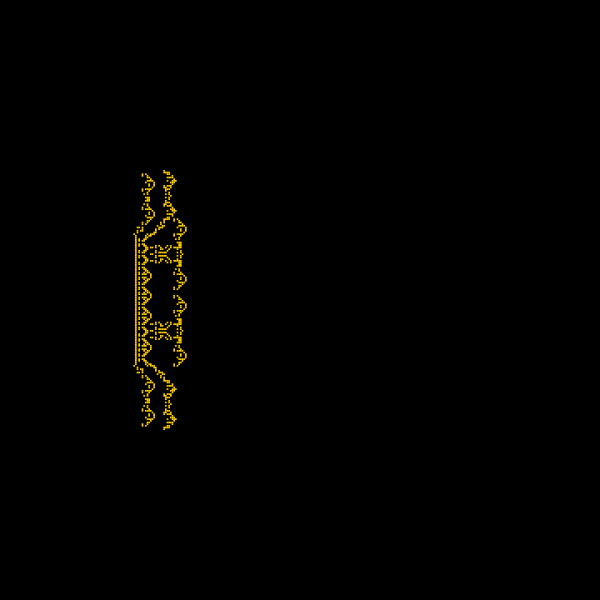

In [30]:
PT3 = recorrerPT(PT)
@draw dibujar_matriz(PT3)

## Dos cangrejos encontrandose

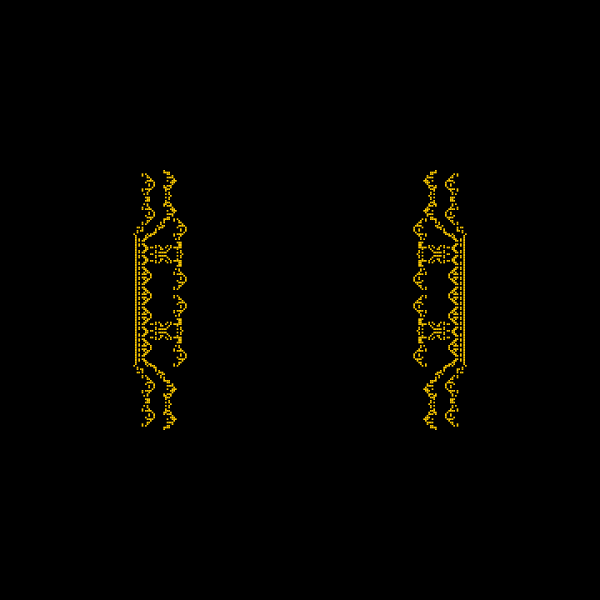

In [31]:
PT4 = PT3 + reflejar_eje_y(PT3)

@draw dibujar_matriz(PT4)

## Medio Space Filler

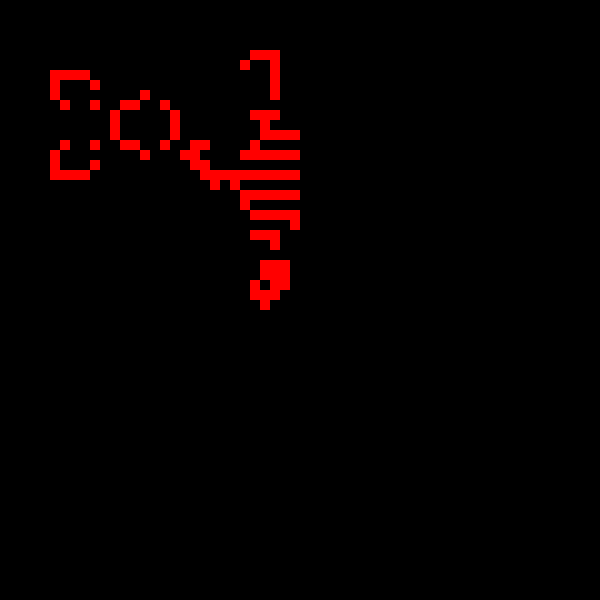

In [38]:
S = zeros(Int8, (50, 50))


S[1, 21:23] .= 1

S[2, 20] = 1
S[2, 23] = 1

S[3, 1:4] .= 1
S[3, 23] = 1
S[4, 1] = 1
S[4, 5] = 1
S[4, 23] = 1
S[5, 1] = 1
S[5, 10] = 1
S[5, 23] = 1
S[6, 2] = 1
S[6, 5] = 1
S[6, 8:9] .= 1
S[6, 12] = 1
S[7, 7] = 1
S[7, 13] = 1
S[7, 21:23] .= 1


S[8, 7] = 1
S[8, 13] = 1
S[8, 22] = 1
S[9, 7] = 1
S[9, 13] = 1
S[9, 22:25] .= 1
S[10, 2] = 1
S[10, 5] = 1
S[10, 8:9] .= 1
S[10, 12] = 1
S[10, 15:16] .= 1
S[10, 21] = 1
S[11, 1] = 1
S[11, 10] = 1
S[11, 14:15] .= 1
S[11, 20:25] .= 1
S[12, 1] = 1
S[12, 5] = 1
S[12, 15:16] .= 1
S[13, 1:4] .= 1
S[13, 16:25] .= 1
S[14, 17] = 1
S[14, 19] = 1
S[15, 20:25] .= 1
S[16, 20] = 1
S[17, 21:25] .= 1
S[18, 25] = 1
S[19, 21:23] .= 1
S[20, 23] = 1
S[22, 22:24] .= 1
S[23, 22:24] .= 1
S[24, 21] = 1
S[24, 23:24] .= 1
S[25, 21:23] .= 1
S[26, 22] = 1

@draw dibujar_matriz(S, 1, 0, 0)

## Space Filler

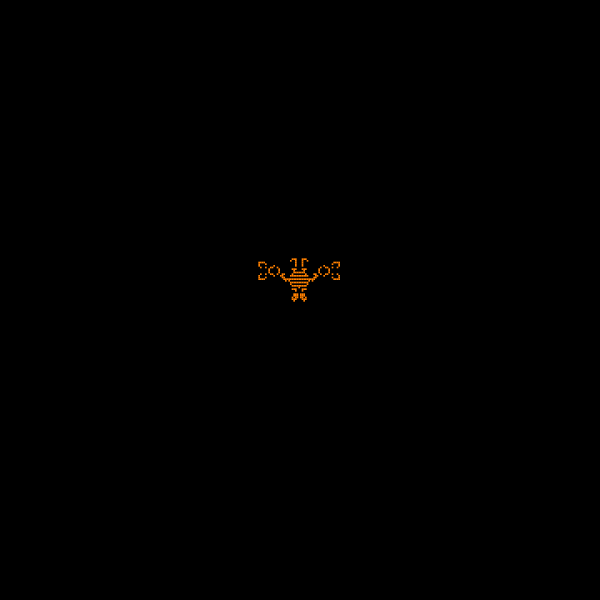

In [39]:
S1 = zeros(Int8, (size(S,1), size(S,1)))
S2 = zeros(Int8, (size(S,1), size(S,1)))

[S1[j, 50 - i] = S[j,i] for j ∈ 1:26, i ∈ 1:25]

S2 = S1 + S
[S2[z, 25] = 1 for z ∈ [9,11,13,15,17]]
S2[18, 25] = 1
S3 = ampliar(S2, 300)
S4 = trasladar_derecha(S3, 125)
S5 = trasladar_abajo(S4, 125)

@draw dibujar_matriz(S5, 1,0.5,0)

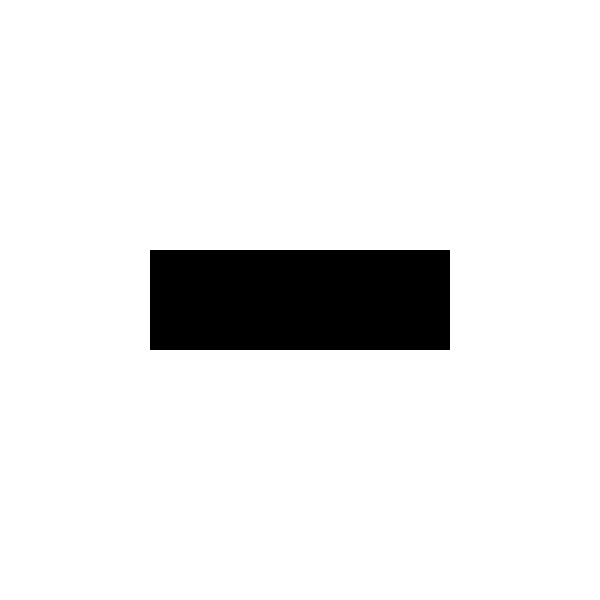

In [33]:
I = zeros(Int8, (5, 5))
I[3, 2:4] .= 1
@draw dibujar_matriz(I, 0, 0, 0)

# Game of Life 

Cómo funciona:

1. Correr las funciones vecinos, dibujar_matriz, evolucionar.
2. Crear una matriz I con la configuración inicial deseada. 
3. Meterla a un arreglo (array = Array[I])
4. Evolucionar imax-imin veces ([evolucionar(array[i]) for i ∈ imin:imax])
5. Correr el código:

    counter = 1
    for i ∈ 1:length(array)
        @png begin
            dibujar_matriz(array[i], 0,0,0)
    end 600 600 "C:/Users/progr/Pictures/Game of Life/Periodica/Periodica_$(counter).png"
        counter += 1
end

Para guardar las evoluciones en la carpeta dada.

In [43]:
function vecinos(j,i,A)
                        A[j-1, i-1] + A[j, i-1] + A[j+1, i-1] +
                        A[j-1, i] + A[j+1, i] + 
                        A[j-1, i+1] + A[j, i+1] + A[j+1, i+1]
end
;

In [44]:
#Funcion dibujar matriz

function dibujar_matriz(M, a, b, c)
    
        k = size(M)[1]
        l = size(M)[2]
    
    background("White")
        t = Table(k, l, 500/k, 500/l)
            for i ∈ 1:l
                for j ∈ 1:k
                    if M[j,i] == 1
                        sethue(a,b,c) #Color de la matriz
                        box(t, j, i, :fill)
                    end
                end
            end 
end

dibujar_matriz (generic function with 1 method)

In [90]:
#Arreglo de arreglos

array = Array[G]

1-element Array{Array,1}:
 Int8[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

In [34]:
function evolucionar(A)
        
        k = size(A)[1]
        l = size(A)[2]
    
        B = copy(A)

            for i ∈ 2:(l - 1)
                for j ∈ 2:(k - 1)
            
                        #=
                                Any live cell with fewer 
                            than two live neighbours dies, 
                            as if by underpopulation.
                        =#

                        if A[j,i] == 1 && vecinos(j,i,A) < 2
                                B[j,i] = 0
                        end

                         #=
                               Any live cell with 
                                two or three live neighbours 
                                lives on to the next generation.
                         =#

                        if A[j,i] == 1 && (vecinos(j,i,A) == 2 || vecinos(j,i,A) == 3)

                            B[j,i] = 1
                        end

                         #=
                               Any live cell with more than three
                                live neighbours dies, 
                                as if by overpopulation.
                        =#

                        if A[j,i] == 1 && vecinos(j,i,A) > 3

                            B[j,i] = 0
                        end

                        #=
                                  Any dead cell with exactly 
                                    three live neighbours becomes a live cell, 
                                        as if by reproduction.      
                        =#

                        if A[j,i] == 0 && vecinos(j,i,A) == 3

                            B[j,i] = 1
                        end

                end
            end
    
            contador = 0
        
            for i ∈ 2:(l - 1), j ∈ 2:(k - 1)
        
                    if B[j,i] == A[j,i]
                        contador += 1
                    end
            end
    
                if contador != ((l-2)*(k-2))
                    push!(array, B)
        else
            nothing
        end
    
        return B

end



evolucionar (generic function with 1 method)

In [48]:
evolucionar(array[1])

100×100 Array{Int8,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0  0  0  0  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0  0  0  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0   

In [92]:
[evolucionar(array[i]) for i ∈ 1:25] #Correr el metodo evolucionar imax-imin veces

#=
    Si marca algo como "BoundsError: attempt to access 2-element Array{Array,1} at index [3]"
    significa que a partir de la segunda evolucion, todos los individuos son iguales.
=#

25-element Array{Array{Int8,2},1}:
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 

In [11]:
#Algo as[i] me propusieron en Julia discourse
#=
let
    H = rand(1:10, 3, 3)
    counter = 1
    for i ∈ 1:length(H)
        @png begin
            text(string(i))
        end 400 400 "$(counter).png"
        counter += 1
    end
end
=#

In [41]:
#=begin
   for i ∈ 1:length(array)
        @png dibujar_matriz(array[i])
    end
    
end
=#
#Tampoco funciona :(

In [93]:
counter = 1
    for i ∈ 1:length(array)
        @png begin
            dibujar_matriz(array[i], 0,0,0)
    end 600 600 "C:/Users/Andrés/Documents/Andres/UNAM/Tesis/Imagenes/GameOfLife/Glider/Glider_$(counter).png"
        counter += 1
end

In [14]:
#=
 for i ∈ 1:length(array)
    @draw dibujar_matriz(array[i])
end

 Mostrar toda la evolucion de M
No entiendo por qu[e] no funciona
=#

In [8]:
#=
#usar Animate.Luxor para crear la animacion 



GameOfLifeMovie = Movie(1080, 1920, "Experimento 1")

function backdrop(scene, framenumber)
    background(0,0,0,1)
end

function frame(scene, framenumber)
    dibujar_matriz(array[framenumber])
end

animate(GameOfLifeMovie, [
        
        Scene(GameOfLifeMovie, backdrop, 1:250)
        Scene(GameOfLifeMovie, frame, 1:250)], 
        framerate = 5, 
        pathname = "GameOfLifeMovieGlider",
        creategif=true,
        )

![alt text](GameOfLifeMovieGlider.gif) #Para mostrar el GIF aqu[i]

=#